In [1]:
import asyncio
from matplotlib import pyplot as plt
import numpy as np

from lsst.ts import salobj

%matplotlib inline

In [2]:
r = salobj.Remote(salobj.Domain(), "ATMCS", include=["measuredMotorVelocity"])

In [3]:
await r.start_task

In [4]:
class Monitor:
    def __init__(self):
        self.el_mv = np.array([])
        self.az1_mv = np.array([])
        self.az2_mv = np.array([])
        self.nas1_mv = np.array([])
        self.nas2_mv = np.array([])
        
    def measuredMotorVelocity_callback(self, data):
        self.el_mv = np.append(self.el_mv, data.elevationMotorVelocity)
        self.az1_mv = np.append(self.az1_mv, data.azimuthMotor1Velocity)
        self.az2_mv = np.append(self.az2_mv, data.azimuthMotor2Velocity)
        self.nas1_mv = np.append(self.nas1_mv, data.nasmyth1MotorVelocity)
        self.nas2_mv = np.append(self.nas2_mv, data.nasmyth2MotorVelocity)

In [5]:
moni = Monitor()

In [6]:
r.tel_measuredMotorVelocity.callback = moni.measuredMotorVelocity_callback

In [7]:
await asyncio.sleep(30)

RemoteTelemetry(ATMCS, 0, measuredMotorVelocity) falling behind; read 16 messages
falling behind; queue contains 15 elements


In [8]:
r.tel_measuredMotorVelocity.callback = None

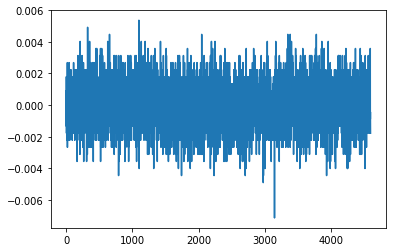

In [9]:
plt.plot(moni.el_mv)

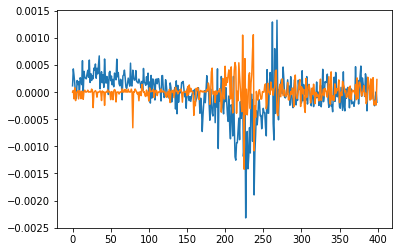

In [15]:
plt.plot(moni.az1_mv[2700:3100])
plt.plot(moni.az2_mv[2700:3100])